In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('out.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'suhu udara', 'kelembaban udara', 'suhu tanah',
       'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
       'tegangan solar', 'tegangan aki', 'status'],
      dtype='object')

<h1>1. FUZZIFIKASI</h1>

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [5]:
def multifuzz(attrs):
    df_fuzz = pd.DataFrame()
    for x in attrs:
        desc = df[x].describe()

        if x in ['suhu udara', 'kelembaban udara', 'suhu tanah', 'kelembaban tanah']:
            rendah = fuzz.trimf(df[x].values, [desc['min'], desc['min'], desc['25%']])
            tengah = fuzz.trimf(df[x].values, [desc['25%'], desc['50%'], desc['75%']])
            tinggi = fuzz.trimf(df[x].values, [desc['75%'], desc['max'], desc['max']])
            df_fuzz[x + '_rendah'] = pd.Series(rendah, index=df.index)
            df_fuzz[x + '_tengah'] = pd.Series(tengah, index=df.index)
            df_fuzz[x + '_tinggi'] = pd.Series(tinggi, index=df.index)
        
        elif x in ['cahaya', 'arus aki', 'arus solar', 'tegangan aki', 'tegangan solar']:
         
            rendah = fuzz.trapmf(df[x].values, [desc['min'], desc['min'], desc['25%'], desc['50%']])
            tengah = fuzz.trapmf(df[x].values, [desc['25%'], desc['50%'], desc['75%'], desc['75%']])
            tinggi = fuzz.trapmf(df[x].values, [desc['50%'], desc['75%'], desc['max'], desc['max']])
            df_fuzz[x + '_rendah'] = pd.Series(rendah, index=df.index)
            df_fuzz[x + '_tengah'] = pd.Series(tengah, index=df.index)
            df_fuzz[x + '_tinggi'] = pd.Series(tinggi, index=df.index)

    return df_fuzz

In [6]:
attributes = ['suhu udara', 'kelembaban udara', 'suhu tanah', 'kelembaban tanah', 
              'cahaya', 'arus solar', 'arus aki', 'tegangan solar', 'tegangan aki']

df_fuzz = multifuzz(attributes)
df_fuzz['status'] = pd.Series(df['status'],index=df.index)
df_fuzz.to_csv('fuzzified.csv', index=False)

In [7]:
pt_desc = df[['suhu udara', 'kelembaban udara', 'suhu tanah', 
              'kelembaban tanah', 'cahaya', 'arus solar', 
              'arus aki', 'tegangan solar', 'tegangan aki']]


fuzzified_results = []

for index, row in pt_desc.iterrows():
    result = []
    
    # Suhu Udara
    if row['suhu udara'] == 0:
        result.append(df_fuzz.loc[index, 'suhu udara_rendah'])
    elif row['suhu udara'] == 1:
        result.append(df_fuzz.loc[index, 'suhu udara_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'suhu udara_tinggi'])

    # Kelembaban Udara
    if row['kelembaban udara'] == 0:
        result.append(df_fuzz.loc[index, 'kelembaban udara_rendah'])
    elif row['kelembaban udara'] == 1:
        result.append(df_fuzz.loc[index, 'kelembaban udara_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'kelembaban udara_tinggi'])

    # Suhu Tanah
    if row['suhu tanah'] == 0:
        result.append(df_fuzz.loc[index, 'suhu tanah_rendah'])
    elif row['suhu tanah'] == 1:
        result.append(df_fuzz.loc[index, 'suhu tanah_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'suhu tanah_tinggi'])

    # Kelembaban Tanah
    if row['kelembaban tanah'] == 0:
        result.append(df_fuzz.loc[index, 'kelembaban tanah_rendah'])
    elif row['kelembaban tanah'] == 1:
        result.append(df_fuzz.loc[index, 'kelembaban tanah_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'kelembaban tanah_tinggi'])

    # Cahaya
    if row['cahaya'] == 0:
        result.append(df_fuzz.loc[index, 'cahaya_rendah'])
    elif row['cahaya'] == 1:
        result.append(df_fuzz.loc[index, 'cahaya_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'cahaya_tinggi'])

    # Arus Solar
    if row['arus solar'] == 0:
        result.append(df_fuzz.loc[index, 'arus solar_rendah'])
    elif row['arus solar'] == 1:
        result.append(df_fuzz.loc[index, 'arus solar_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'arus solar_tinggi'])

    # Arus Aki
    if row['arus aki'] == 0:
        result.append(df_fuzz.loc[index, 'arus aki_rendah'])
    elif row['arus aki'] == 1:
        result.append(df_fuzz.loc[index, 'arus aki_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'arus aki_tinggi'])

    # Tegangan Solar
    if row['tegangan solar'] == 0:
        result.append(df_fuzz.loc[index, 'tegangan solar_rendah'])
    elif row['tegangan solar'] == 1:
        result.append(df_fuzz.loc[index, 'tegangan solar_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'tegangan solar_tinggi'])

    # Tegangan Aki
    if row['tegangan aki'] == 0:
        result.append(df_fuzz.loc[index, 'tegangan aki_rendah'])
    elif row['tegangan aki'] == 1:
        result.append(df_fuzz.loc[index, 'tegangan aki_tengah'])
    else:
        result.append(df_fuzz.loc[index, 'tegangan aki_tinggi'])

    fuzzified_results.append(result)


fuzzified_df = pd.DataFrame(fuzzified_results, columns=['suhu_udara', 'kelembaban_udara', 'suhu_tanah', 
                                                        'kelembaban_tanah', 'cahaya', 'arus_solar', 
                                                        'arus_aki', 'tegangan_solar', 'tegangan_aki'])

fuzzified_df['status'] = df['status']
fuzzified_df.to_csv('fuzzified_output.csv', index=False)

In [30]:
df_fuzz[(df_fuzz['status']=="mendung siram")].describe()

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus solar_tinggi,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,...,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,0.111,0.090,0.000,0.000,0.000,0.497,0.072,0.179,0.212,0.000,...,0.000,0.000,0.473,0.760,0.000,0.000,1.000,0.000,0.000,1.000
std,0.142,0.118,0.000,0.000,0.000,0.317,0.163,0.297,0.310,0.000,...,0.000,0.000,0.499,0.324,0.000,0.000,0.000,0.000,0.000,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
25%,0.000,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.513,0.000,0.000,1.000,0.000,0.000,1.000
50%,0.006,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
75%,0.220,0.184,0.000,0.000,0.000,0.800,0.000,0.304,0.410,0.000,...,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
max,0.435,0.363,0.000,0.000,0.000,1.000,0.654,1.000,1.000,0.000,...,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000


In [ ]:
df_fuzz[(df_fuzz['status']=="mendung siram")].describe()

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus solar_tinggi,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi
count,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,...,10000.0,10000.0,10000.00000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.110771,0.090051,0.0,0.0,0.0,0.496540,0.072329,0.179246,0.212285,0.0,...,0.0,0.0,0.47290,0.760269,0.0,0.0,1.0,0.0,0.0,1.0
std,0.141629,0.117564,0.0,0.0,0.0,0.316834,0.163088,0.296631,0.309651,0.0,...,0.0,0.0,0.49929,0.324221,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
25%,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.00000,0.512821,0.0,0.0,1.0,0.0,0.0,1.0
50%,0.005650,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.00000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0
75%,0.220339,0.184080,0.0,0.0,0.0,0.800000,0.000000,0.304054,0.409605,0.0,...,0.0,0.0,1.00000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0
max,0.435028,0.363184,0.0,0.0,0.0,1.000000,0.653979,1.000000,1.000000,0.0,...,0.0,0.0,1.00000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
df_fuzz[(df_fuzz['status']=="mendung kering")].describe()

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus solar_tinggi,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi
count,9870.000000,9870.0,9870.0,9870.0,9870.000000,9870.000000,9870.000000,9870.000000,9870.000000,9870.000000,...,9870.0,9870.0,9870.0,9870.0,9870.0,9870.0,9870.0,9870.0,9870.0,9870.0
mean,0.580968,0.0,0.0,0.0,0.268625,0.138318,0.072901,0.185441,0.203030,0.068800,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
std,0.247356,0.0,0.0,0.0,0.339542,0.177795,0.161813,0.299318,0.307266,0.067101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.152542,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,0.361582,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
50%,0.587571,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.054054,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
75%,0.796610,0.0,0.0,0.0,0.666667,0.300000,0.000000,0.327044,0.384181,0.135135,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
max,1.000000,0.0,0.0,0.0,1.000000,0.500000,0.653979,1.000000,1.000000,0.189189,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [10]:
df_fuzz[(df_fuzz['status']=="cerah siram")].describe()

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus solar_tinggi,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.0,20000.0,...,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.0,0.403431,0.185935,0.226587,0.272917,0.0,0.266338,0.267212,0.0,0.0,...,0.562908,0.0,0.519450,0.919671,0.316264,0.561236,0.311744,0.222888,0.529112,0.440901
std,0.0,0.385421,0.299302,0.344998,0.341118,0.0,0.329620,0.336443,0.0,0.0,...,0.429335,0.0,0.499634,0.103696,0.392685,0.429199,0.389176,0.352975,0.447816,0.427626
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.348837,0.000000,0.000000,0.000000,0.0,0.051903,0.000000,0.0,0.0,...,0.666667,0.0,1.000000,1.000000,0.007937,0.664903,0.000000,0.000000,0.597035,0.343455
75%,0.0,0.800995,0.325581,0.500000,0.666667,0.0,0.536332,0.554054,0.0,0.0,...,1.000000,0.0,1.000000,1.000000,0.680776,1.000000,0.661972,0.410040,1.000000,0.995026
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_fuzz[(df_fuzz['status']=="cerah kering")].describe()

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus solar_tinggi,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.0,0.400866,0.188060,0.226575,0.274400,0.0,0.0,0.343654,0.073650,0.206978,...,0.561279,0.982451,0.017549,0.0,0.311651,0.562699,0.313068,0.406816,0.593184,0.112052
std,0.0,0.383911,0.302111,0.345083,0.342749,0.0,0.0,0.334147,0.127020,0.311362,...,0.430451,0.014839,0.014839,0.0,0.390392,0.428896,0.391392,0.407338,0.407338,0.182205
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.959016,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.967213,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.153639,0.000000
50%,0.0,0.337209,0.000000,0.000000,0.000000,0.0,0.0,0.276730,0.000000,0.000000,...,0.666667,0.983607,0.016393,0.0,0.001764,0.670194,0.000000,0.292453,0.707547,0.000000
75%,0.0,0.791045,0.337209,0.500000,0.666667,0.0,0.0,0.635135,0.110169,0.378378,...,1.000000,1.000000,0.032787,0.0,0.666667,1.000000,0.672535,0.846361,1.000000,0.192670
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.435028,1.000000,...,1.000000,1.000000,0.040984,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.609424


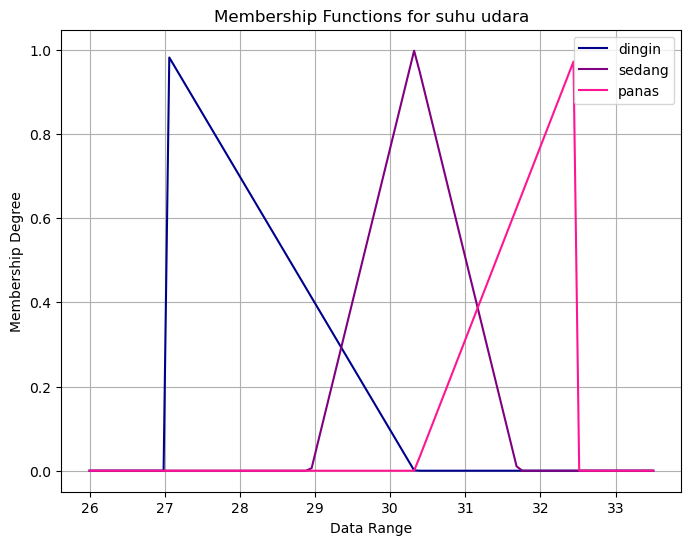

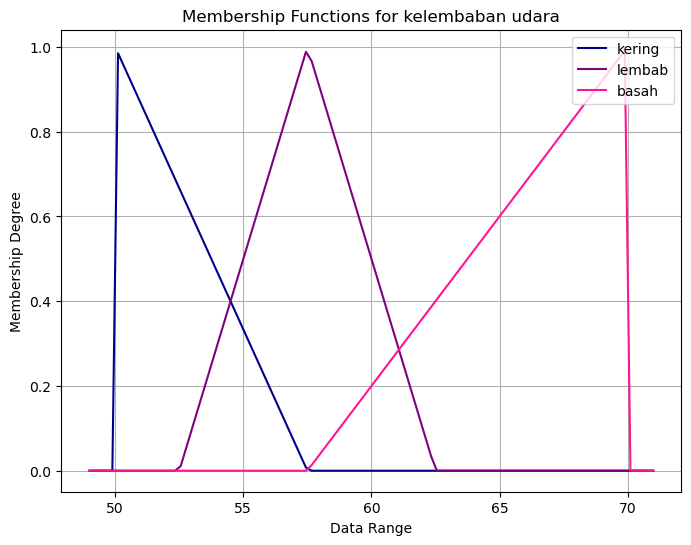

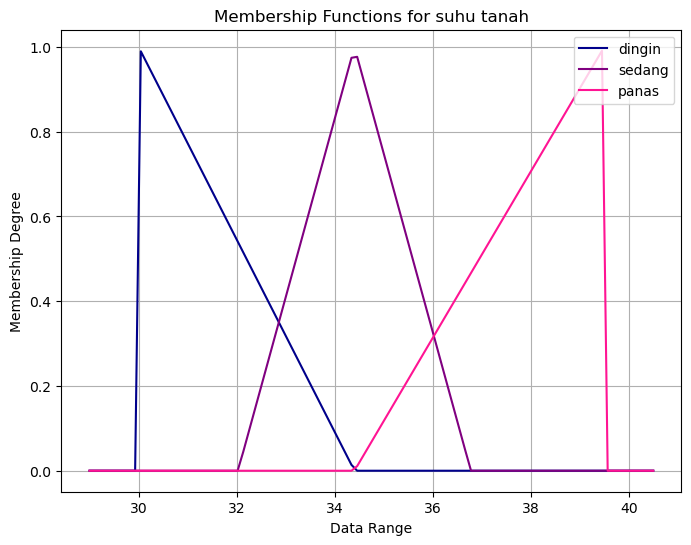

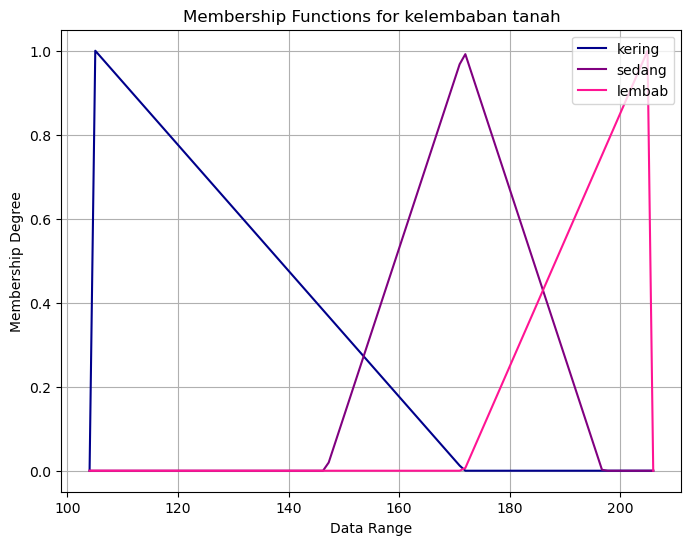

In [13]:
df = pd.read_csv('out.csv')
variables = {
    "suhu udara": ["dingin", "sedang", "panas"],
    "kelembaban udara": ["kering", "lembab", "basah"],
    "suhu tanah": ["dingin", "sedang", "panas"],
    "kelembaban tanah": ["kering", "sedang", "lembab"]
}
def plot_fuzz(var, labels, data):
    x = np.linspace(np.min(data)-1, np.max(data)+1, 100)
    low, mid, high = fuzz.trimf(x, [np.min(data), np.min(data), np.mean(data)]), \
                     fuzz.trimf(x, [np.mean(data)-np.ptp(data)/4, np.mean(data), np.mean(data)+np.ptp(data)/4]), \
                     fuzz.trimf(x, [np.mean(data), np.max(data), np.max(data)])
    plt.figure(figsize=(8, 6))
    plt.plot(x, low, label=f'{labels[0]}', color='darkblue')
    plt.plot(x, mid, label=f'{labels[1]}', color='purple')
    plt.plot(x, high, label=f'{labels[2]}', color='deeppink')

    plt.title(f'Membership Functions for {var}')
    plt.xlabel('Data Range')
    plt.ylabel('Membership Degree')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
for var, labels in variables.items():
    if var in df.columns: plot_fuzz(var, labels, df[var].dropna())
    else: print(f"Warning: '{var}' not found.")


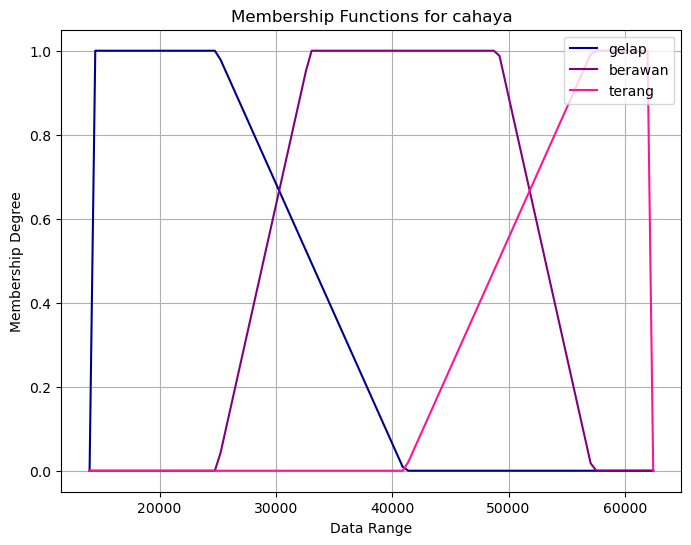

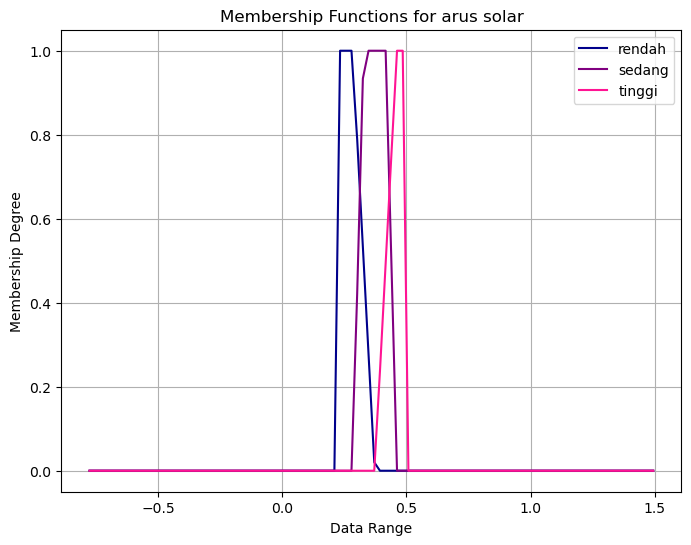

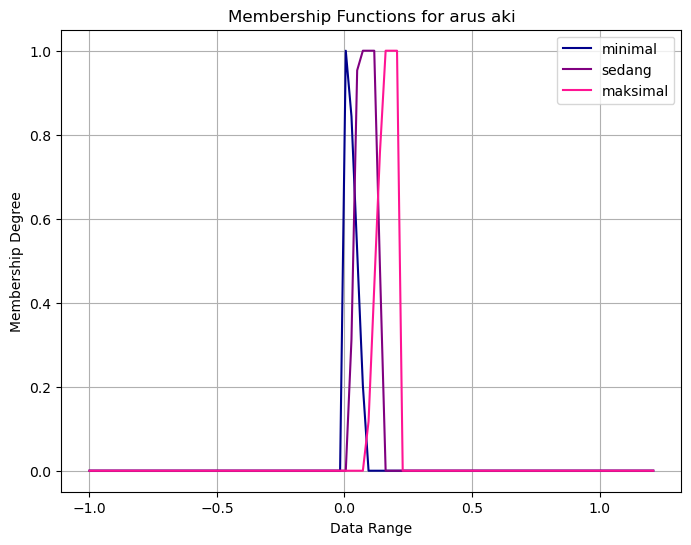

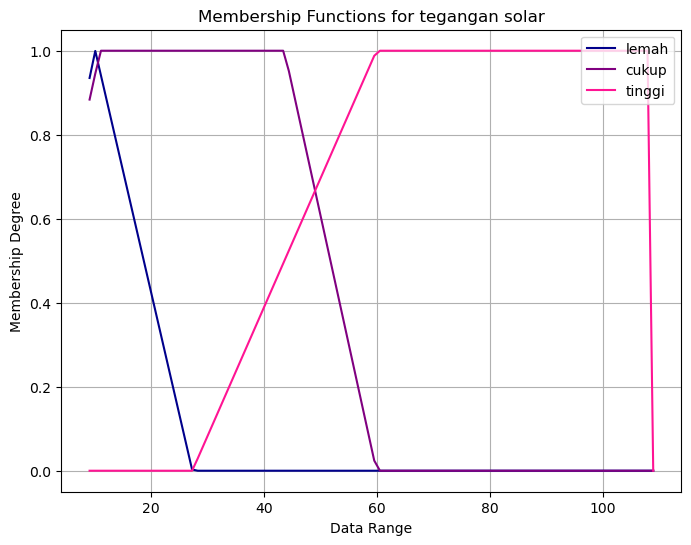

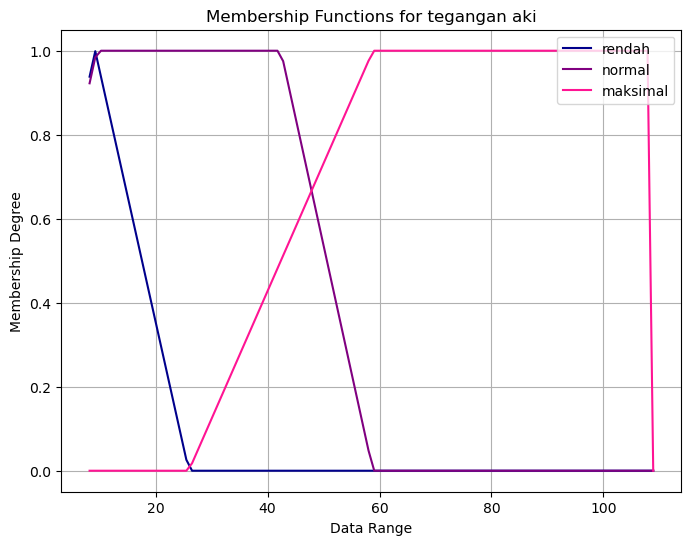

In [14]:
df = pd.read_csv('out.csv')

variables = {
    "cahaya": ["gelap", "berawan", "terang"],
    "arus solar": ["rendah", "sedang", "tinggi"],
    "arus aki": ["minimal", "sedang", "maksimal"],
    "tegangan solar": ["lemah", "cukup", "tinggi"],
    "tegangan aki": ["rendah", "normal", "maksimal"],
}

def plot_fuzz(var, labels, data):
    x = np.linspace(np.min(data) - 1, np.max(data) + 1, 100)
    range_width = np.ptp(data) / 3

    low_points = [np.min(data), np.min(data), np.mean(data) - range_width, np.mean(data)]
    mid_points = [np.mean(data) - range_width, np.mean(data) - range_width / 2, np.mean(data) + range_width / 2, np.mean(data) + range_width]
    high_points = [np.mean(data), np.mean(data) + range_width, np.max(data), np.max(data)]

    low_points.sort()
    mid_points.sort()
    high_points.sort()

    low = fuzz.trapmf(x, low_points)
    mid = fuzz.trapmf(x, mid_points)
    high = fuzz.trapmf(x, high_points)

    plt.figure(figsize=(8, 6))
    plt.plot(x, low, label=f'{labels[0]}', color='darkblue')
    plt.plot(x, mid, label=f'{labels[1]}', color='purple')
    plt.plot(x, high, label=f'{labels[2]}', color='deeppink')
    plt.title(f'Membership Functions for {var}')
    plt.xlabel('Data Range')
    plt.ylabel('Membership Degree')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


for var, labels in variables.items():
    if var in df.columns:
        plot_fuzz(var, labels, df[var].dropna())
    else:
        print(f"Warning: '{var}' not found.")


<h1>2. DISKRETISASI</h1>

In [12]:
def discretization(attr):
    inp = list(df[attr].to_numpy())
    midi = df[attr].describe()
    out = []
    
    p33 = midi['25%']  
    p66 = midi['75%'] 

    for x in inp:
        if x <= float(p33):
            out.append(0) 
        elif x > float(p33) and x <= float(p66):
            out.append(1)  
        else:
            out.append(2) 
    
    return out

In [13]:
def multiDiscretization(attrs):
    df_desc = pd.DataFrame()
    for x in attrs:
        df_desc[x] = pd.Series(discretization(x),index=df.index)
    return df_desc

In [14]:
df_desc = multiDiscretization(['suhu udara', 'kelembaban udara', 'suhu tanah',
       'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
       'tegangan solar', 'tegangan aki'])

In [15]:
df_desc['status'] = pd.Series(df['status'],index=df.index)
df_desc

,suhu udara,kelembaban udara,suhu tanah,kelembaban tanah,cahaya,arus solar,arus aki,tegangan solar,tegangan aki,status
0,0,1,2,1,0,0,2,2,2,mendung siram
1,1,2,1,1,0,0,1,2,2,mendung siram
2,0,2,1,1,1,1,2,2,2,mendung siram
3,0,2,0,1,0,0,2,2,2,mendung siram
4,0,2,1,1,0,0,1,2,2,mendung siram
...,...,...,...,...,...,...,...,...,...,...
59865,1,0,1,1,1,1,1,1,1,cerah kering
59866,1,0,1,0,1,1,0,1,1,cerah kering
59867,2,0,1,1,2,1,1,1,1,cerah kering
59868,2,0,1,1,1,1,1,1,1,cerah kering


<h1>3. Support Pivot Tabel</h1>

In [20]:
pt_desc = df_desc.pivot_table(index=['suhu udara', 'kelembaban udara', 'suhu tanah', 
                                    'kelembaban tanah', 'cahaya', 'arus solar', 
                                    'arus aki', 'tegangan solar', 'tegangan aki', 'status'],
                             aggfunc='mean')  

pt_desc.to_csv('pivott.csv', index=True)

In [21]:
pt_desc

Empty DataFrame
Columns: []
Index: [(0, 1, 0, 0, 0, 0, 0, 0, 0, mendung kering), (0, 1, 0, 0, 0, 1, 0, 0, 0, mendung kering), (0, 1, 0, 0, 1, 0, 0, 0, 0, mendung kering), (0, 1, 0, 0, 1, 1, 0, 0, 0, mendung kering), (0, 1, 0, 1, 0, 0, 0, 0, 0, mendung kering), (0, 1, 0, 1, 0, 0, 1, 2, 2, mendung siram), (0, 1, 0, 1, 0, 0, 2, 2, 2, mendung siram), (0, 1, 0, 1, 0, 1, 0, 0, 0, mendung kering), (0, 1, 0, 1, 0, 1, 1, 2, 2, mendung siram), (0, 1, 0, 1, 0, 1, 2, 2, 2, mendung siram), (0, 1, 0, 1, 1, 0, 0, 0, 0, mendung kering), (0, 1, 0, 1, 1, 0, 1, 2, 2, mendung siram), (0, 1, 0, 1, 1, 0, 2, 2, 2, mendung siram), (0, 1, 0, 1, 1, 1, 0, 0, 0, mendung kering), (0, 1, 0, 1, 1, 1, 1, 2, 2, mendung siram), (0, 1, 0, 1, 1, 1, 2, 2, 2, mendung siram), (0, 1, 1, 0, 0, 0, 0, 0, 0, mendung kering), (0, 1, 1, 0, 0, 1, 0, 0, 0, mendung kering), (0, 1, 1, 0, 1, 0, 0, 0, 0, mendung kering), (0, 1, 1, 0, 1, 1, 0, 0, 0, mendung kering), (0, 1, 1, 1, 0, 0, 0, 0, 0, mendung kering), (0, 1, 1, 1, 0, 0, 1, 2, 2, mendung siram), (0, 1, 1, 1, 0, 0, 2, 2, 2, mendung siram), (0, 1, 1, 1, 0, 1, 0, 0, 0, mendung kering), (0, 1, 1, 1, 0, 1, 1, 2, 2, mendung siram), (0, 1, 1, 1, 0, 1, 2, 2, 2, mendung siram), (0, 1, 1, 1, 1, 0, 0, 0, 0, mendung kering), (0, 1, 1, 1, 1, 0, 1, 2, 2, mendung siram), (0, 1, 1, 1, 1, 0, 2, 2, 2, mendung siram), (0, 1, 1, 1, 1, 1, 0, 0, 0, mendung kering), (0, 1, 1, 1, 1, 1, 1, 2, 2, mendung siram), (0, 1, 1, 1, 1, 1, 2, 2, 2, mendung siram), (0, 1, 2, 0, 0, 0, 0, 0, 0, mendung kering), (0, 1, 2, 0, 0, 1, 0, 0, 0, mendung kering), (0, 1, 2, 0, 1, 0, 0, 0, 0, mendung kering), (0, 1, 2, 0, 1, 1, 0, 0, 0, mendung kering), (0, 1, 2, 1, 0, 0, 0, 0, 0, mendung kering), (0, 1, 2, 1, 0, 0, 1, 2, 2, mendung siram), (0, 1, 2, 1, 0, 0, 2, 2, 2, mendung siram), (0, 1, 2, 1, 0, 1, 0, 0, 0, mendung kering), (0, 1, 2, 1, 0, 1, 1, 2, 2, mendung siram), (0, 1, 2, 1, 0, 1, 2, 2, 2, mendung siram), (0, 1, 2, 1, 1, 0, 0, 0, 0, mendung kering), (0, 1, 2, 1, 1, 0, 1, 2, 2, mendung siram), (0, 1, 2, 1, 1, 0, 2, 2, 2, mendung siram), (0, 1, 2, 1, 1, 1, 0, 0, 0, mendung kering), (0, 1, 2, 1, 1, 1, 1, 2, 2, mendung siram), (0, 1, 2, 1, 1, 1, 2, 2, 2, mendung siram), (0, 2, 0, 0, 0, 0, 0, 0, 0, mendung kering), (0, 2, 0, 0, 0, 1, 0, 0, 0, mendung kering), (0, 2, 0, 0, 1, 0, 0, 0, 0, mendung kering), (0, 2, 0, 0, 1, 1, 0, 0, 0, mendung kering), (0, 2, 0, 1, 0, 0, 0, 0, 0, mendung kering), (0, 2, 0, 1, 0, 0, 1, 2, 2, mendung siram), (0, 2, 0, 1, 0, 0, 2, 2, 2, mendung siram), (0, 2, 0, 1, 0, 1, 0, 0, 0, mendung kering), (0, 2, 0, 1, 0, 1, 1, 2, 2, mendung siram), (0, 2, 0, 1, 0, 1, 2, 2, 2, mendung siram), (0, 2, 0, 1, 1, 0, 0, 0, 0, mendung kering), (0, 2, 0, 1, 1, 0, 1, 2, 2, mendung siram), (0, 2, 0, 1, 1, 0, 2, 2, 2, mendung siram), (0, 2, 0, 1, 1, 1, 0, 0, 0, mendung kering), (0, 2, 0, 1, 1, 1, 1, 2, 2, mendung siram), (0, 2, 0, 1, 1, 1, 2, 2, 2, mendung siram), (0, 2, 1, 0, 0, 0, 0, 0, 0, mendung kering), (0, 2, 1, 0, 0, 1, 0, 0, 0, mendung kering), (0, 2, 1, 0, 1, 0, 0, 0, 0, mendung kering), (0, 2, 1, 0, 1, 1, 0, 0, 0, mendung kering), (0, 2, 1, 1, 0, 0, 0, 0, 0, mendung kering), (0, 2, 1, 1, 0, 0, 1, 2, 2, mendung siram), (0, 2, 1, 1, 0, 0, 2, 2, 2, mendung siram), (0, 2, 1, 1, 0, 1, 0, 0, 0, mendung kering), (0, 2, 1, 1, 0, 1, 1, 2, 2, mendung siram), (0, 2, 1, 1, 0, 1, 2, 2, 2, mendung siram), (0, 2, 1, 1, 1, 0, 0, 0, 0, mendung kering), (0, 2, 1, 1, 1, 0, 1, 2, 2, mendung siram), (0, 2, 1, 1, 1, 0, 2, 2, 2, mendung siram), (0, 2, 1, 1, 1, 1, 0, 0, 0, mendung kering), (0, 2, 1, 1, 1, 1, 1, 2, 2, mendung siram), (0, 2, 1, 1, 1, 1, 2, 2, 2, mendung siram), (0, 2, 2, 0, 0, 0, 0, 0, 0, mendung kering), (0, 2, 2, 0, 0, 1, 0, 0, 0, mendung kering), (0, 2, 2, 0, 1, 0, 0, 0, 0, mendung kering), (0, 2, 2, 0, 1, 1, 0, 0, 0, mendung kering), (0, 2, 2, 1, 0, 0, 0, 0, 0, mendung kering), (0, 2, 2, 1, 0, 0, 1, 2, 2, mendung siram), (0, 2, 2, 1, 0, 0, 2, 2, 2, mendung siram), (0, 2, 2, 1, 0, 1, 0, 0, 0, mendung kering), (0, 2, 2, 1, 0, 1, 1, 2, 2, mendung siram), (0

In [22]:
category_mapping = {
    "suhu udara": {0: "dingin", 1: "sedang", 2: "panas"},
    "kelembaban udara": {0: "kering", 1: "lembab", 2: "basah"},
    "suhu tanah": {0: "dingin", 1: "sedang", 2: "panas"},
    "kelembaban tanah": {0: "kering", 1: "sedang", 2: "lembab"},
    "cahaya": {0: "gelap", 1: "berawan", 2: "terang"},
    "arus solar": {0: "rendah", 1: "sedang", 2: "tinggi"},
    "arus aki": {0: "minimal", 1: "sedang", 2: "maksimal"},
    "tegangan solar": {0: "lemah", 1: "cukup", 2: "tinggi"},
    "tegangan aki": {0: "rendah", 1: "normal", 2: "maksimal"},
}

for column, mapping in category_mapping.items():
    df_desc[column] = df_desc[column].map(mapping)
pt_desc = df_desc.pivot_table(
    index=['suhu udara', 'kelembaban udara', 'suhu tanah',
           'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
           'tegangan solar', 'tegangan aki', 'status'],
    aggfunc='size'
)
print(pt_desc)

suhu udara  kelembaban udara  suhu tanah  kelembaban tanah  cahaya   arus solar  arus aki  tegangan solar  tegangan aki  status        
dingin      basah             dingin      kering            berawan  rendah      minimal   lemah           rendah        mendung kering    148
                                                                     sedang      minimal   lemah           rendah        mendung kering     33
                                                            gelap    rendah      minimal   lemah           rendah        mendung kering    472
                                                                     sedang      minimal   lemah           rendah        mendung kering    130
                                          sedang            berawan  rendah      maksimal  tinggi          maksimal      mendung siram     109
                                                                                                                                          ... 
sedang

In [23]:
total_transactions = len(df)
pt_desc_support = pt_desc.reset_index(name='frequency')
pt_desc_support['support'] = pt_desc_support['frequency'] / total_transactions


In [24]:
pt_desc_support.to_csv('support.csv', index=False)
pt_desc_support

,suhu udara,kelembaban udara,suhu tanah,kelembaban tanah,cahaya,arus solar,arus aki,tegangan solar,tegangan aki,status,frequency,support
0,dingin,basah,dingin,kering,berawan,rendah,minimal,lemah,rendah,mendung kering,148,0.002472
1,dingin,basah,dingin,kering,berawan,sedang,minimal,lemah,rendah,mendung kering,33,0.000551
2,dingin,basah,dingin,kering,gelap,rendah,minimal,lemah,rendah,mendung kering,472,0.007884
3,dingin,basah,dingin,kering,gelap,sedang,minimal,lemah,rendah,mendung kering,130,0.002171
4,dingin,basah,dingin,sedang,berawan,rendah,maksimal,tinggi,maksimal,mendung siram,109,0.001821
...,...,...,...,...,...,...,...,...,...,...,...,...
1917,sedang,lembab,sedang,sedang,terang,tinggi,sedang,lemah,rendah,cerah kering,7,0.000117
1918,sedang,lembab,sedang,sedang,terang,tinggi,sedang,tinggi,maksimal,cerah siram,2,0.000033
1919,sedang,lembab,sedang,sedang,terang,tinggi,sedang,tinggi,normal,cerah kering,28,0.000468
1920,sedang,lembab,sedang,sedang,terang,tinggi,sedang,tinggi,normal,cerah siram,2,0.000033
